In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

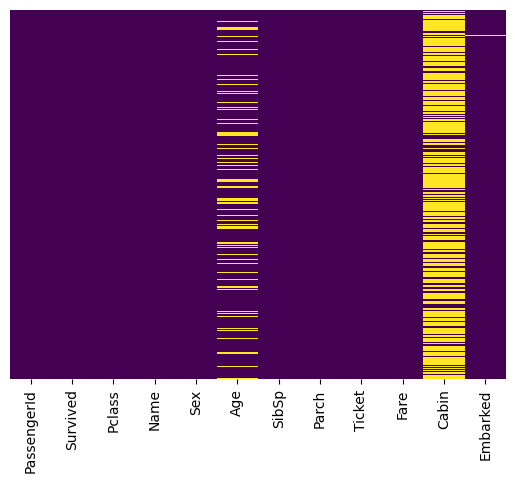

In [7]:
# data analysis
# heatmap to check missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

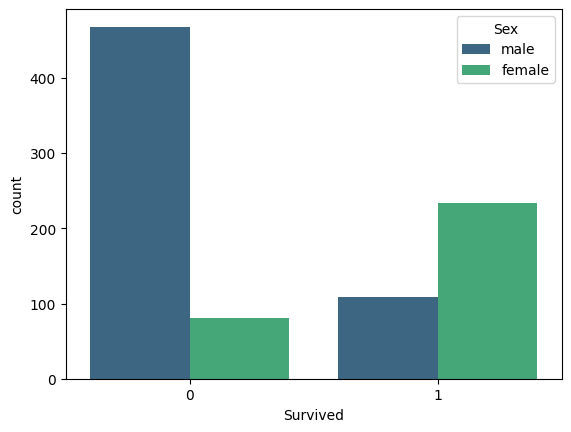

In [11]:
sns.countplot(x='Survived', data=train, palette='viridis', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

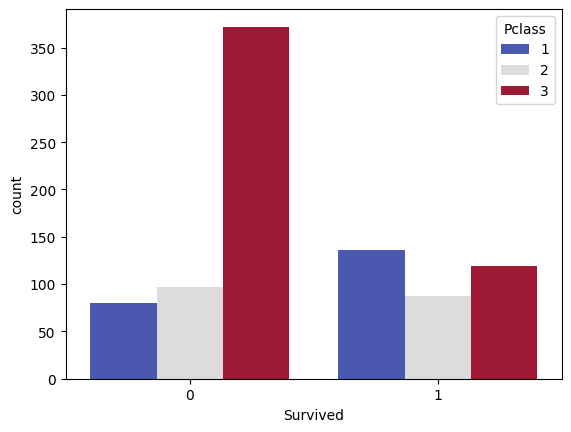

In [15]:
sns.countplot(x='Survived', data=train, palette='coolwarm', hue='Pclass')

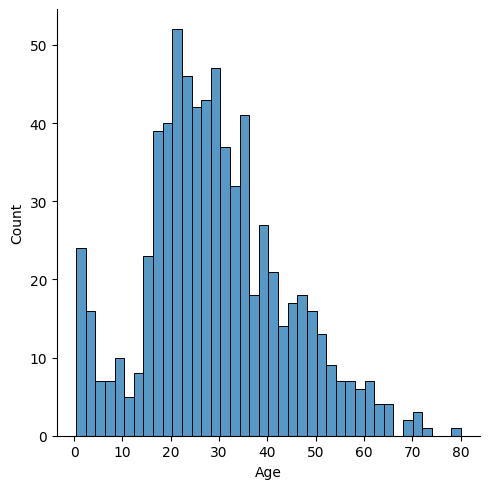

In [19]:
sns.displot(train['Age'].dropna(), bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

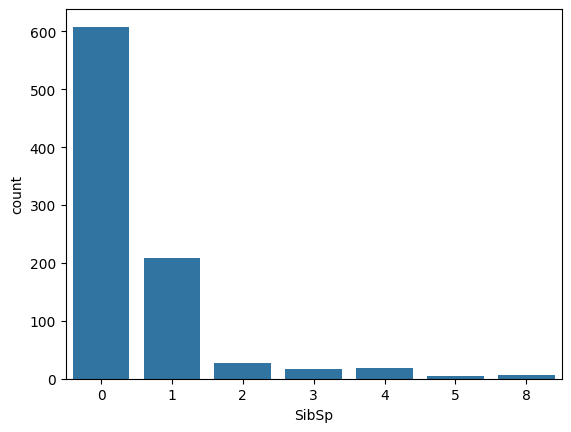

In [20]:
sns.countplot(x='SibSp', data=train)

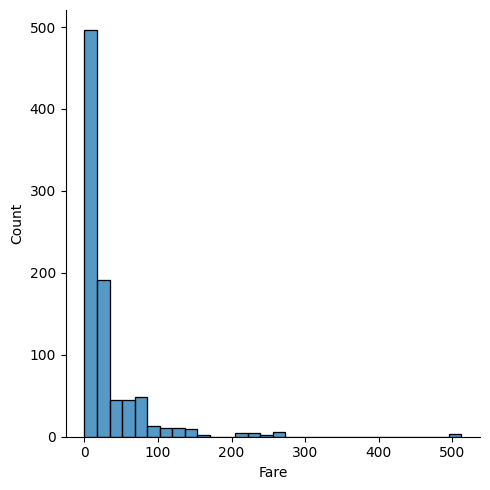

In [22]:
sns.displot(train['Fare'].dropna(), bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

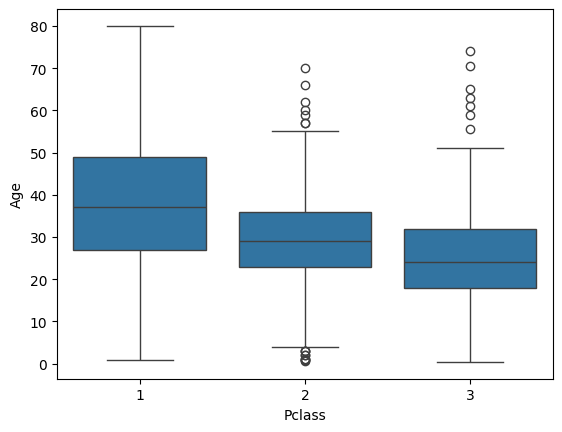

In [24]:
# data cleaning
sns.boxplot(x='Pclass', y='Age', data=train)

In [27]:
train.groupby('Pclass')['Age'].agg(['median', 'count'])

,median,count
Pclass,,
1,37.0,186
2,29.0,173
3,24.0,355


In [28]:
train['Age'] = train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


<Axes: >

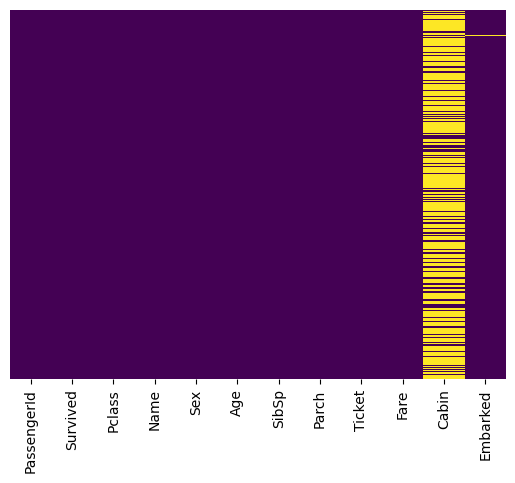

In [29]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
train.drop('Cabin', axis=1, inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [56]:
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'],axis=1, inplace=True, errors='ignore')

In [57]:
train = pd.concat([train, sex, embark], axis=1)

In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


In [59]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [60]:
# running cross validation with multiple metrics
def evaluate_models(X, y, models, cv=5):
    results = {}
    metrics = ['accuracy', 'f1', 'precision', 'recall']
    for name, model in models.items():
        scores = cross_validate(model, X, y, cv=cv, scoring=metrics)
        model_scores = {metric: np.mean(scores[f'test_{metric}']) for metric in metrics} # mean of each metric (dictionary comprehension)
        results[name] = model_scores

        # print them
        print(f"\n{name}:")
        for metric, score in model_scores.items():
            print(f"{metric}: {score:.3f}")
    
    return results

In [61]:
X = train.drop('Survived', axis=1)
y = train['Survived']
models = {"logistic regression": LogisticRegression(max_iter=1000), "random forest": RandomForestClassifier(n_estimators=100),
          "KNN": KNeighborsClassifier(n_neighbors=5), "SVM": SVC(kernel='rbf', C=1, gamma='scale')}

results = evaluate_models(X, y, models, cv=5)


logistic regression:
accuracy: 0.796
f1: 0.722
precision: 0.756
recall: 0.693

random forest:
accuracy: 0.807
f1: 0.744
precision: 0.754
recall: 0.737

KNN:
accuracy: 0.684
f1: 0.568
precision: 0.600
recall: 0.541

SVM:
accuracy: 0.675
f1: 0.404
precision: 0.676
recall: 0.290
